## Análisis exploratorio de datos

Para este análisis usamos el dataset "csse_covid_19_time_series" de *Daily reports (csse_covid_19_daily_reports)* en el link https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 

Este es el repositorio de datos para el 2019 Novel Coronavirus Visual Dashboard operado por el Centro de Ciencias e Ingeniería de Sistemas de la Universidad Johns Hopkins (JHU CSSE). Además, con el apoyo del equipo de ESRI Living Atlas y el Laboratorio de Física Aplicada de la Universidad Johns Hopkins (JHU APL).

In [1]:
import pandas as pd

In [2]:
# Leemos el conjunto de datos de casos confirmado utilizando su url, para tener el dataFrame siempre actualizado
# estos datos son actualizados diariamente
confirmados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

### Entendiendo el conjunto de datos

In [3]:
confirmados.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [4]:
confirmados.shape

(468, 62)

In [5]:
confirmados.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20'],
      dtype='object')

In [6]:
confirmados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 62 columns):
Province/State    322 non-null object
Country/Region    468 non-null object
Lat               468 non-null float64
Long              468 non-null float64
1/22/20           468 non-null int64
1/23/20           468 non-null int64
1/24/20           468 non-null int64
1/25/20           468 non-null int64
1/26/20           468 non-null int64
1/27/20           468 non-null int64
1/28/20           468 non-null int64
1/29/20           468 non-null int64
1/30/20           468 non-null int64
1/31/20           468 non-null int64
2/1/20            468 non-null int64
2/2/20            468 non-null int64
2/3/20            468 non-null int64
2/4/20            468 non-null int64
2/5/20            468 non-null int64
2/6/20            468 non-null int64
2/7/20            468 non-null int64
2/8/20            468 non-null int64
2/9/20            468 non-null int64
2/10/20           468 non-null int64
2

In [7]:
confirmados.sample(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
455,Aruba,Netherlands,12.5186,-70.0358,0,0,0,0,0,0,...,0,0,0,2,2,2,2,3,4,4
198,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,3,4
340,"Washington County, OR",US,45.5470,-123.1386,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900
304,"Douglas County, NE",US,41.3148,-96.1951,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,147,146,146
187,Xinjiang,China,41.1129,85.2401,0,2,2,3,4,5,...,76,76,76,76,76,76,76,76,76,76
347,"King County, WA",US,47.6062,-122.3321,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
39,NaN,Norway,60.4720,8.4689,0,0,0,0,0,0,...,400,598,702,996,1090,1221,1333,1463,1550,1746
435,NaN,Central African Republic,6.6111,20.9394,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1


In [8]:
confirmados['Country/Region']

0            Thailand
1               Japan
2           Singapore
3               Nepal
4            Malaysia
            ...      
463    United Kingdom
464              Chad
465       El Salvador
466              Fiji
467         Nicaragua
Name: Country/Region, Length: 468, dtype: object

In [44]:
last_date = confirmados['3/19/20']

In [10]:
last_date

0      212
1      889
2      313
3        1
4      790
      ... 
463      0
464      0
465      0
466      0
467      0
Name: 3/18/20, Length: 468, dtype: int64

In [11]:
confirmados['Country/Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [12]:
confirmados['Province/State'].unique()

array([nan, 'British Columbia', 'New South Wales', 'Victoria',
       'Queensland', 'South Australia', 'From Diamond Princess',
       'Western Australia', 'Tasmania', 'Northern Territory', 'Ontario',
       'Alberta', 'Quebec', 'Washington', 'New York', 'California',
       'Massachusetts', 'Diamond Princess', 'Grand Princess', 'Georgia',
       'Colorado', 'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Hubei', 'France', 'G

In [13]:
# Visualizando los datos por el numero de fila usando 'iloc'
confirmados.iloc[0]

Province/State         NaN
Country/Region    Thailand
Lat                     15
Long                   101
1/22/20                  2
                    ...   
3/15/20                114
3/16/20                147
3/17/20                177
3/18/20                212
3/19/20                272
Name: 0, Length: 62, dtype: object

In [14]:
# Filtrando los datos por pais
seleccion = confirmados['Country/Region'] == 'Paraguay'
confirmados[seleccion]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
91,NaN,Paraguay,-23.4425,-58.4438,0,0,0,0,0,0,...,1,5,5,6,6,6,8,9,11,11


In [15]:
# Asignando una columna del DataFrame como indice 
# Visualizando los datos por indice usando 'loc'
confirmados.set_index('Province/State').loc['Montserrat']

Country/Region    United Kingdom
Lat                      16.7425
Long                    -62.1874
1/22/20                        0
1/23/20                        0
                       ...      
3/15/20                        0
3/16/20                        0
3/17/20                        0
3/18/20                        1
3/19/20                        1
Name: Montserrat, Length: 61, dtype: object

In [16]:
# Visualizando los datos de la linea 91
confirmados.set_index('Province/State').iloc[91]

Country/Region    Paraguay
Lat               -23.4425
Long              -58.4438
1/22/20                  0
1/23/20                  0
                    ...   
3/15/20                  6
3/16/20                  8
3/17/20                  9
3/18/20                 11
3/19/20                 11
Name: nan, Length: 61, dtype: object

In [17]:
# Cantidad de casos por pais
# Estos datos no son interesantes por que existen varias filas de un mismo pais
confirmados['Country/Region'].value_counts()

US                                  247
China                                33
Canada                               11
Australia                             9
France                                9
                                   ... 
Saint Vincent and the Grenadines      1
Kenya                                 1
Germany                               1
San Marino                            1
Fiji                                  1
Name: Country/Region, Length: 155, dtype: int64

In [18]:
# Para tener la frecuencia de casos por pais usar group_by para agrupar por pais y sumar todas las filas correspondientes
confirmados.groupby('Country/Region').sum()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,5,7,7,7,11,16,21,22,22,22
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,10,12,23,33,38,42,51,55,59,64
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,20,20,24,26,37,48,54,60,74,87
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,39,39,53
Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,-32.5228,-55.7658,0,0,0,0,0,0,0,0,...,0,0,0,0,4,4,8,29,50,79
Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,6,10,15,23
Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,0,...,0,0,0,0,2,10,17,33,36,42


In [19]:
confirmed_by_country = confirmados.groupby('Country/Region').sum()

In [20]:
confirmed_by_country.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,5,7,7,7,11,16,21,22,22,22
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,10,12,23,33,38,42,51,55,59,64
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,20,20,24,26,37,48,54,60,74,87
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,39,39,53
Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,...,17,19,19,31,34,45,56,68,79,97
Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,...,1,1,4,8,18,26,52,78,84,115
Australia,-220.5258,1269.5003,0,0,0,0,4,5,5,6,...,107,128,128,200,250,297,377,452,568,681
Austria,47.5162,14.5501,0,0,0,0,0,0,0,0,...,182,246,302,504,655,860,1018,1332,1646,2013


In [21]:
confirmed_by_country.tail()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Uruguay,-32.5228,-55.7658,0,0,0,0,0,0,0,0,...,0,0,0,0,4,4,8,29,50,79
Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,6,10,15,23
Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,0,...,0,0,0,0,2,10,17,33,36,42
Vietnam,16.0000,108.0000,0,2,2,2,2,2,2,2,...,31,38,39,47,53,56,61,66,75,85
Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [22]:
confirmed_by_country.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,10,12,23,33,38,42,51,55,59,64
Namibia,-22.9576,18.4904,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,3
Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,6,10,15,23
Chile,-35.6751,-71.5430,0,0,0,0,0,0,0,0,...,13,23,23,43,61,74,155,201,238,238
Guyana,5.0000,-58.7500,0,0,0,0,0,0,0,0,...,0,0,1,1,1,4,4,7,7,7
Cameroon,3.8480,11.5021,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,4,10,10,13
Chad,15.4542,18.7322,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,...,581,639,639,701,773,839,825,878,889,924
Lebanon,33.8547,35.8623,0,0,0,0,0,0,0,0,...,41,61,61,77,93,110,99,120,133,157


In [23]:
# Visualizar los datos filtrando por el pais Brasil
confirmed_by_country.loc['Brazil']

Lat        -14.2350
Long       -51.9253
1/22/20      0.0000
1/23/20      0.0000
1/24/20      0.0000
1/25/20      0.0000
1/26/20      0.0000
1/27/20      0.0000
1/28/20      0.0000
1/29/20      0.0000
1/30/20      0.0000
1/31/20      0.0000
2/1/20       0.0000
2/2/20       0.0000
2/3/20       0.0000
2/4/20       0.0000
2/5/20       0.0000
2/6/20       0.0000
2/7/20       0.0000
2/8/20       0.0000
2/9/20       0.0000
2/10/20      0.0000
2/11/20      0.0000
2/12/20      0.0000
2/13/20      0.0000
2/14/20      0.0000
2/15/20      0.0000
2/16/20      0.0000
2/17/20      0.0000
2/18/20      0.0000
2/19/20      0.0000
2/20/20      0.0000
2/21/20      0.0000
2/22/20      0.0000
2/23/20      0.0000
2/24/20      0.0000
2/25/20      0.0000
2/26/20      1.0000
2/27/20      1.0000
2/28/20      1.0000
2/29/20      2.0000
3/1/20       2.0000
3/2/20       2.0000
3/3/20       2.0000
3/4/20       4.0000
3/5/20       4.0000
3/6/20      13.0000
3/7/20      13.0000
3/8/20      20.0000
3/9/20      25.0000


In [24]:
# Visualizar los datos filtrando por el pais China
confirmed_by_country.loc["China"]

Lat         1083.3367
Long        3684.4197
1/22/20      548.0000
1/23/20      643.0000
1/24/20      920.0000
1/25/20     1406.0000
1/26/20     2075.0000
1/27/20     2877.0000
1/28/20     5509.0000
1/29/20     6087.0000
1/30/20     8141.0000
1/31/20     9802.0000
2/1/20     11891.0000
2/2/20     16630.0000
2/3/20     19716.0000
2/4/20     23707.0000
2/5/20     27440.0000
2/6/20     30587.0000
2/7/20     34110.0000
2/8/20     36814.0000
2/9/20     39829.0000
2/10/20    42354.0000
2/11/20    44386.0000
2/12/20    44759.0000
2/13/20    59895.0000
2/14/20    66358.0000
2/15/20    68413.0000
2/16/20    70513.0000
2/17/20    72434.0000
2/18/20    74211.0000
2/19/20    74619.0000
2/20/20    75077.0000
2/21/20    75550.0000
2/22/20    77001.0000
2/23/20    77022.0000
2/24/20    77241.0000
2/25/20    77754.0000
2/26/20    78166.0000
2/27/20    78600.0000
2/28/20    78928.0000
2/29/20    79356.0000
3/1/20     79932.0000
3/2/20     80136.0000
3/3/20     80261.0000
3/4/20     80386.0000
3/5/20    

In [25]:
# Visualizar los datos filtrando por el pais China y solo los datos de series temporales
confirmed_by_country.loc["China"][2:]

1/22/20      548.0
1/23/20      643.0
1/24/20      920.0
1/25/20     1406.0
1/26/20     2075.0
1/27/20     2877.0
1/28/20     5509.0
1/29/20     6087.0
1/30/20     8141.0
1/31/20     9802.0
2/1/20     11891.0
2/2/20     16630.0
2/3/20     19716.0
2/4/20     23707.0
2/5/20     27440.0
2/6/20     30587.0
2/7/20     34110.0
2/8/20     36814.0
2/9/20     39829.0
2/10/20    42354.0
2/11/20    44386.0
2/12/20    44759.0
2/13/20    59895.0
2/14/20    66358.0
2/15/20    68413.0
2/16/20    70513.0
2/17/20    72434.0
2/18/20    74211.0
2/19/20    74619.0
2/20/20    75077.0
2/21/20    75550.0
2/22/20    77001.0
2/23/20    77022.0
2/24/20    77241.0
2/25/20    77754.0
2/26/20    78166.0
2/27/20    78600.0
2/28/20    78928.0
2/29/20    79356.0
3/1/20     79932.0
3/2/20     80136.0
3/3/20     80261.0
3/4/20     80386.0
3/5/20     80537.0
3/6/20     80690.0
3/7/20     80770.0
3/8/20     80823.0
3/9/20     80860.0
3/10/20    80887.0
3/11/20    80921.0
3/12/20    80932.0
3/13/20    80945.0
3/14/20    8

In [26]:
# Con esta linea, la salida de los comandos de pyplot (plt) se muestran en línea dentro de las interfaces 
# como el Jupyter notebook, directamente debajo de la celda de código que lo produjo. 
# Los trazados(plots) resultantes también se almacenarán en el notebook.
%matplotlib inline

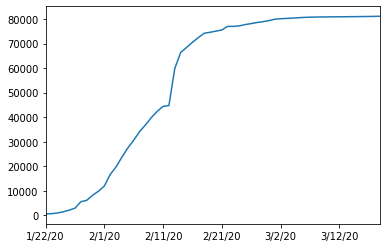

In [27]:
confirmed_by_country.loc["China"][2:].plot()

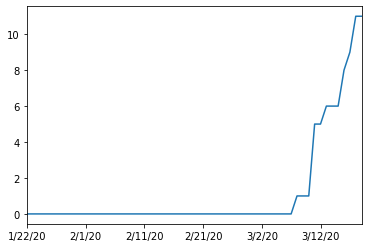

In [28]:
confirmed_by_country.loc["Paraguay"][2:].plot()

La curva de casos confirmados de Paraguay parece crecer en forma lineal, tambien con los primeros casos de China. El problema es que, viendo este tipo de gráficos es muy difícil saber cómo es el crecimiento: si comparamos la evolucion de Paraguay con la de China parece que el escenario es de lo peor. 

In [29]:
import matplotlib.pyplot as plt

In [30]:
from pylab import *

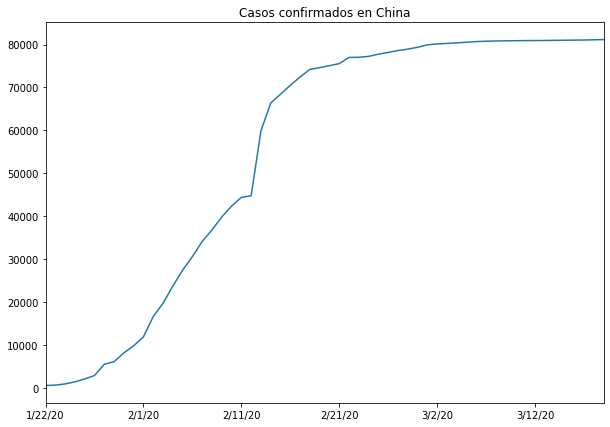

In [31]:
# ejemplo feo de manipular los ejes
# comparar el momento inicial con 1.386 bi (poblacion de China en 2017)
# uso de figsize
plt.figure(figsize=(10,7))
# cambiando el rango de valores en x
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados en China")
# cambiando el rango de valores en y
#plt.ylim(40000, 80000)
#plt.ylim(40000, 300000)
# cambiando la escala de los ejes estamos pasando mensajes diferentes
plt.show()

Las epidemias no tienen un comportamiento exponencial. Y no lo son porque, en un sistema finito, a partir de cierto momento la misma estructura social limita su crecimiento: no hay suficientes humanos en el mundo para mantener ese crecimiento exponencial. 
En matematica se dice que la primera fase tiene un comportamiento como una curva exponencial. Por eso para visualizar mejor se utiliza una escala logaritmica.

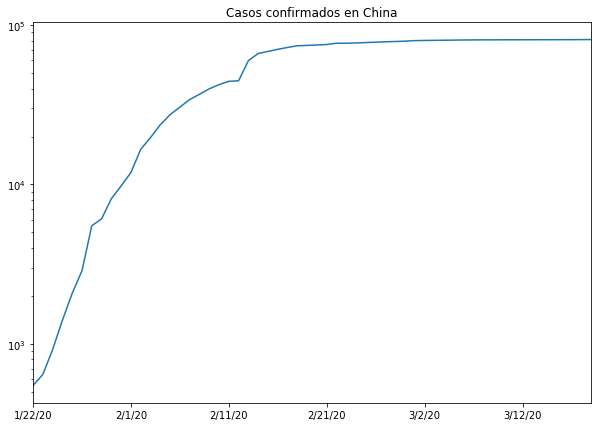

In [32]:
plt.figure(figsize=(10,7))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados en China")
# cambiando la escala de valores en y a logaritmica
plt.semilogy(0,80000)
plt.show()

In [33]:
confirmed_by_country.shape

(155, 60)

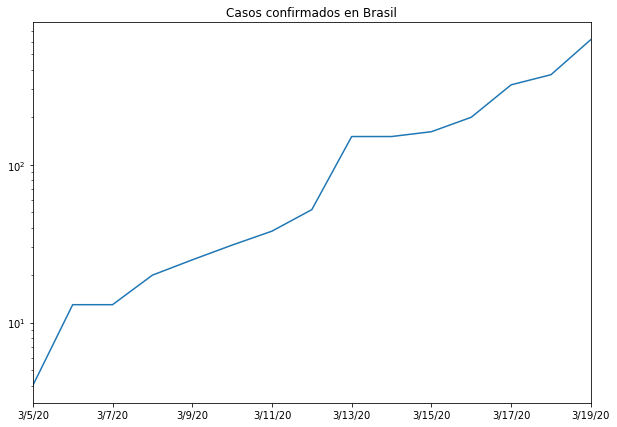

In [34]:
plt.figure(figsize=(10,7))
confirmed_by_country.loc["Brazil"][45:].plot()
plt.title("Casos confirmados en Brasil")
# cambiando la escala de valores en y a logaritmica
plt.semilogy(0,13)
plt.show()

Cuando pasamos los datos a una escala logarítmica la situación cambia. Cuando hablamos de escala logarítmica hablamos de una gráfica en la que la distancia entre países con 100 y 1.000 casos es la misma que entre países con 1.000 y 10.000, porque el tiempo que se necesita para pasar de unos a otros es el mismo. Con este tipo de gráficas es muy fácil identificar un fenómeno exponencial porque los datos dibujan una línea recta.

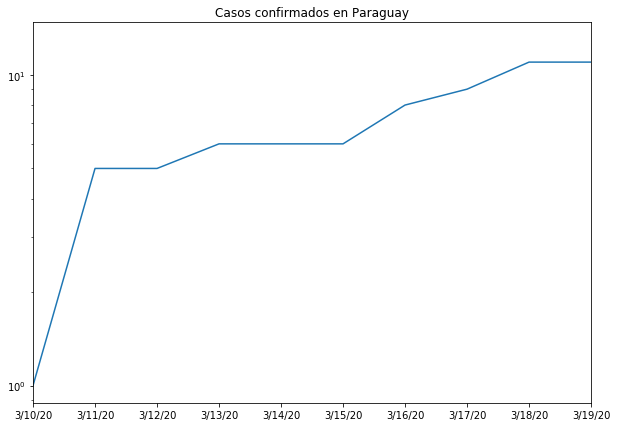

In [35]:
plt.figure(figsize=(10,7))
confirmed_by_country.loc["Paraguay"][50:].plot()
plt.title("Casos confirmados en Paraguay")
# cambiando la escala de valores en y a logaritmica
plt.semilogy(0,13)
plt.show()

Comparando las tres curvas de China, Brasil y Paraguay. Se puede visualizar que China y Paraguay parecen haber alcanzado la fase de desaceleracion de aparicion de casos, mientras que Brasil se encuentra en la fase de crecimiento exponencial.
El caso de Paraguay es incierto por que todavia son muy pocos casos, por lo tanto no se puede asegurar si la pandemia esta controlada.

### Visualizando la aceleracion de la aparicion de casos confirmados

In [36]:
# diferencia de un dia para otro
confirmed_by_country.loc["China"][2:].diff()

1/22/20        NaN
1/23/20       95.0
1/24/20      277.0
1/25/20      486.0
1/26/20      669.0
1/27/20      802.0
1/28/20     2632.0
1/29/20      578.0
1/30/20     2054.0
1/31/20     1661.0
2/1/20      2089.0
2/2/20      4739.0
2/3/20      3086.0
2/4/20      3991.0
2/5/20      3733.0
2/6/20      3147.0
2/7/20      3523.0
2/8/20      2704.0
2/9/20      3015.0
2/10/20     2525.0
2/11/20     2032.0
2/12/20      373.0
2/13/20    15136.0
2/14/20     6463.0
2/15/20     2055.0
2/16/20     2100.0
2/17/20     1921.0
2/18/20     1777.0
2/19/20      408.0
2/20/20      458.0
2/21/20      473.0
2/22/20     1451.0
2/23/20       21.0
2/24/20      219.0
2/25/20      513.0
2/26/20      412.0
2/27/20      434.0
2/28/20      328.0
2/29/20      428.0
3/1/20       576.0
3/2/20       204.0
3/3/20       125.0
3/4/20       125.0
3/5/20       151.0
3/6/20       153.0
3/7/20        80.0
3/8/20        53.0
3/9/20        37.0
3/10/20       27.0
3/11/20       34.0
3/12/20       11.0
3/13/20       13.0
3/14/20     

In [37]:
# extraemos la fila que no contiene datos faltantes utilizando dropna
confirmed_by_country.loc["China"][2:].diff().dropna()

1/23/20       95.0
1/24/20      277.0
1/25/20      486.0
1/26/20      669.0
1/27/20      802.0
1/28/20     2632.0
1/29/20      578.0
1/30/20     2054.0
1/31/20     1661.0
2/1/20      2089.0
2/2/20      4739.0
2/3/20      3086.0
2/4/20      3991.0
2/5/20      3733.0
2/6/20      3147.0
2/7/20      3523.0
2/8/20      2704.0
2/9/20      3015.0
2/10/20     2525.0
2/11/20     2032.0
2/12/20      373.0
2/13/20    15136.0
2/14/20     6463.0
2/15/20     2055.0
2/16/20     2100.0
2/17/20     1921.0
2/18/20     1777.0
2/19/20      408.0
2/20/20      458.0
2/21/20      473.0
2/22/20     1451.0
2/23/20       21.0
2/24/20      219.0
2/25/20      513.0
2/26/20      412.0
2/27/20      434.0
2/28/20      328.0
2/29/20      428.0
3/1/20       576.0
3/2/20       204.0
3/3/20       125.0
3/4/20       125.0
3/5/20       151.0
3/6/20       153.0
3/7/20        80.0
3/8/20        53.0
3/9/20        37.0
3/10/20       27.0
3/11/20       34.0
3/12/20       11.0
3/13/20       13.0
3/14/20       32.0
3/15/20     

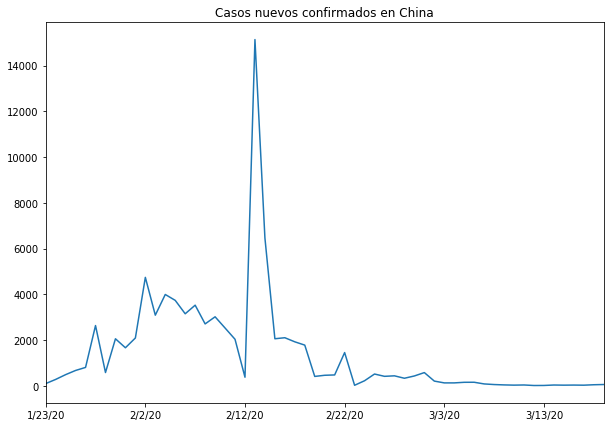

In [38]:
# Trazamos la curva de aceleracion de casos nuevos en China
plt.figure(figsize=(10,7))
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()
plt.title("Casos nuevos confirmados en China")
new_cases_china.plot()

Atencion que los graficos de China tienen diferentes rangos en el eje Y, uno es de hasta 80000 y el otro hasta 14000
No podemos colocar los graficos juntos como si fuese la misma cosa.
En este grafico extrajimos informacion que esta presente en los datos y que no se veia directamente. Conseguimos extraer informacion nueva.

En la DataFrame inicial no conseguimos ver los datos nuevos, en los graficos conseguimos ver usando la derivada(utilizando diff). Algo que no es trivial. Con esto queda mas claro la variacion de los casos.
Vemos un pico (cerca del 12 de Febrero) por que la definicion de confirmados cambio en ese dia. Casos diagnosticados en clinicas y puestos de salud fueron definidos como confirmados, sin necesidad de un examen.

Tambien este grafico nos muestra que la velocidad de aparicion de casos nuevos se ha estabilizado.

### Tortas o barras para comparar valores

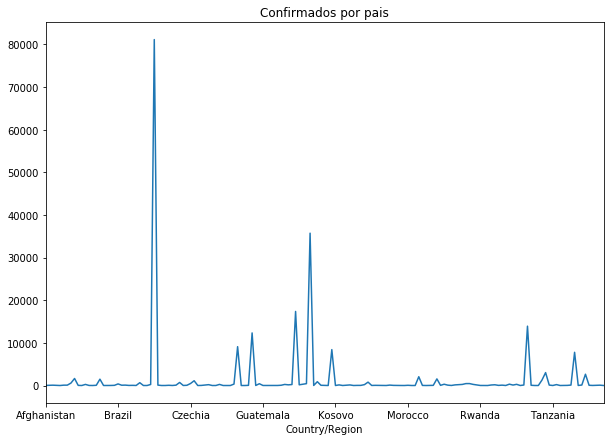

In [39]:
# Queremos visualizar la cantidad de casos por pais
plt.figure(figsize=(10,7))
confirmed_by_country['3/18/20'].plot()
plt.title("Confirmados por pais")
plt.show()

Utilizar un grafico lineal no tiene sentido cuando quiero ver categorias. En los graficos anteriores utilizamos series temporales (fechas). Las fechas asumen valores discretos y tienen un orden, aunque tambien puede considerarse como categorico en algunas ocasiones.

En el caso de paises, datos categoricos, no existe una relacion entre ellos. No tienen un orden. En este caso podemos intentar un grafico de tipo torta o 'pie'.

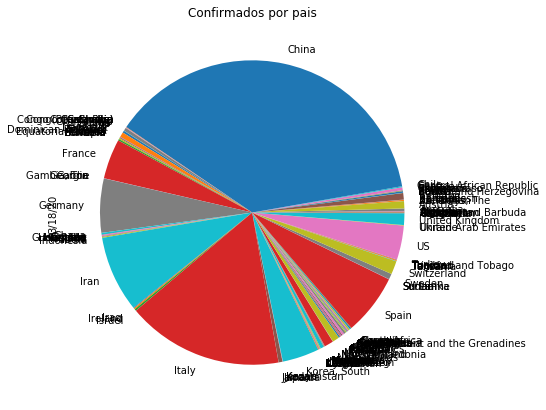

In [40]:
# 99.99% de las veces no usar pie
# con muchas categorias no use, no sera claro
# si voy a usar pie tengo que pensar en el area, en proporcion, si se usa pie se compara por areas
plt.figure(figsize=(10,7))
confirmed_by_country['3/18/20'].plot(kind='pie')
plt.title("Confirmados por pais")
plt.show()

Otra opcion es usar el grafico de tipo barras, cambiamos el argumento a kind=bar

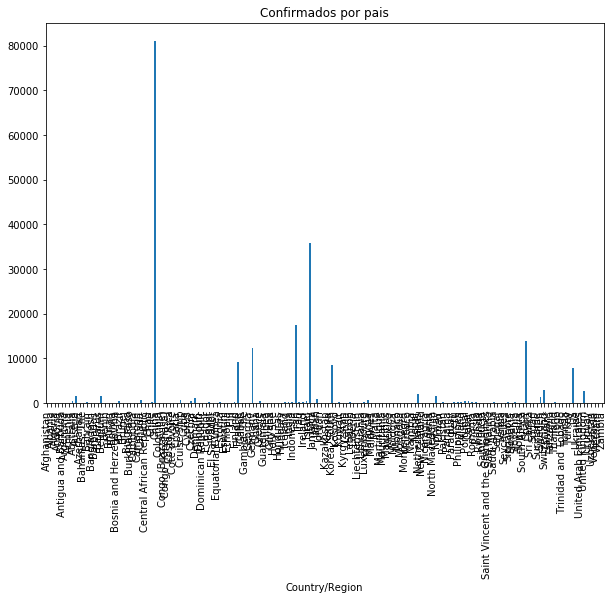

In [41]:
plt.figure(figsize=(10,7))
confirmed_by_country['3/18/20'].plot(kind='bar')
plt.title("Confirmados por pais")
plt.show()
# quiero ordenar? 

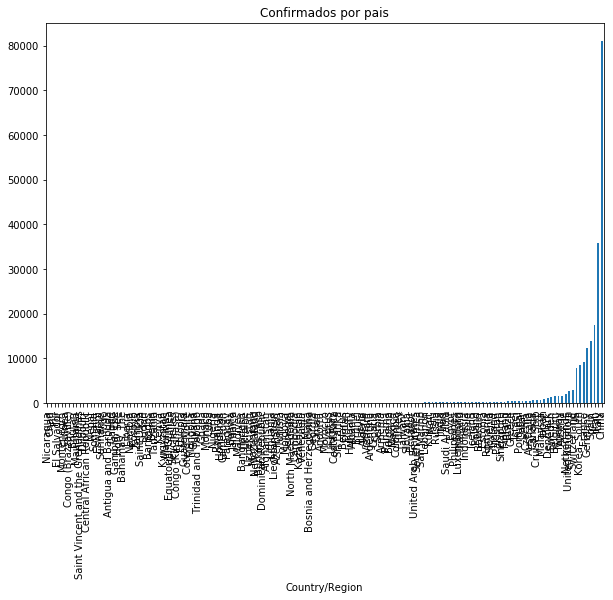

In [42]:
# Puedo usar sort_values para ordenar
plt.figure(figsize=(10,7))
confirmed_by_country['3/18/20'].sort_values(ascending=True).plot(kind='bar')
plt.title("Confirmados por pais")
plt.show()

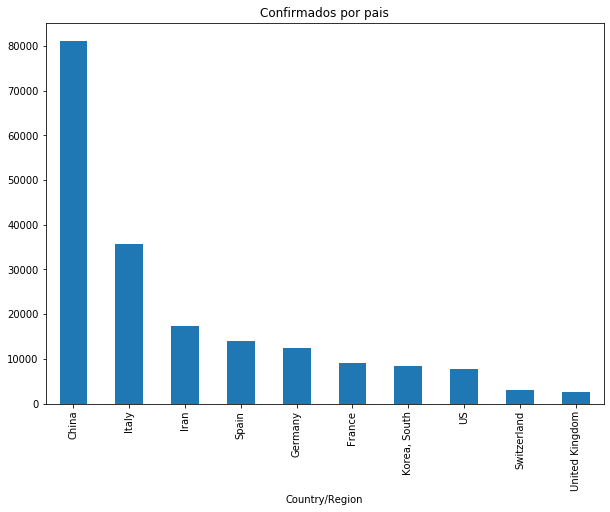

In [43]:
# Visualizar los primero 10 paises
plt.figure(figsize=(10,7))
confirmed_by_country['3/18/20'].sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Confirmados por pais")
plt.show()

**Observacion**: Tenemos datos, pero debemos enfocarnos en el contexto que es el área de la epidemiologia. Para extraer información en este contexto debemos manejar otros conocimientos. 

El conjunto de datos solo tiene casos confirmados, no sabemos la letalidad, no tenemos la incidencia
Cuáles son las provincias infectadas? no puedo comparar con toda la poblacion de China ya que los casos varian segun la region.
Son aspectos a tener en cuenta a la hora de producir informacion de valor